In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 1. REGRESSION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras import models, layers
from sklearn import preprocessing

Using TensorFlow backend.


In [0]:
data_reg=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data_Science/odev/kc_house_data.csv")

In [4]:
data_reg.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Feature Engineering Convertions to Do for Better Results:

1. Calculating age that house sold,
2. Calculating age that house renovated,
3. Dropping ID, date, zipcode, yr_built and yr_renovated columns,
4. Correcting the bathroom quantities.

In [0]:
data_reg["age_sold"]=np.int64([i[0:4] for i in data_reg["date"]]) - data_reg["yr_built"]

data_reg["yr_renovated"]=data_reg["yr_renovated"].replace(0, data_reg["yr_built"])
data_reg["yrs_past_renovation"]=np.int64([i[0:4] for i in data_reg["date"]]) - data_reg["yr_renovated"]

data_reg["bathrooms"]=[math.trunc(i) for i in data_reg["bathrooms"]]

data_reg=data_reg.drop(data_reg[data_reg["bedrooms"]>15].index, axis=0)
data_reg=data_reg.drop(data_reg[data_reg["bedrooms"]==0].index, axis=0)
data_reg=data_reg.drop(data_reg[data_reg["bathrooms"]==0].index, axis=0)

data_reg=data_reg.drop(["id"], axis=1)
data_reg=data_reg.drop(["date"], axis=1)
data_reg=data_reg.drop(["zipcode"], axis=1)
data_reg=data_reg.drop(["yr_built"], axis=1)
data_reg=data_reg.drop(["yr_renovated"], axis=1)

data_reg=data_reg.reset_index(drop=True)

In [0]:
X=data_reg.iloc[:,1:]
y=data_reg.iloc[:,0:1]

In [0]:
X_norm=(X-X.mean())/X.std()

y_norm=(y-y.mean())/y.std()

In [0]:
X_data, X_test, y_data, y_test=train_test_split(X_norm, y_norm, test_size=0.2, random_state=285)
X_train, X_valid, y_train, y_valid=train_test_split(X_data, y_data, test_size=0.25, random_state=285)

#### Deep Learning Model

In [9]:
regressor=models.Sequential()

regressor.add(layers.Dense(20, activation="relu", input_shape=(17,)))
regressor.add(layers.Dense(10, activation="relu"))
regressor.add(layers.Dense(1))

regressor.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history=regressor.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), verbose=0)

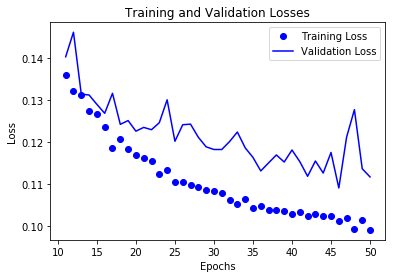

In [10]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(1, len(loss)+1)

plt.plot(epochs[10:], loss[10:], "bo", label="Training Loss")
plt.plot(epochs[10:], val_loss[10:], "b", label="Validation Loss")
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [0]:
pred_tr=regressor.predict(X_train)
pred=regressor.predict(X_test)

In [12]:
print("---------- REGRESSION ----------")
print("Mean Absolute Error (MAE)             : {}".format(mean_absolute_error(y_test, pred)))
print("Mean Squared Error (MSE)              : {}".format(mse(y_test, pred)))
print("Root Mean Square Error (RMSE)         : {}".format(rmse(y_test, pred)))
print("Mean Absolute Percentage Error (MAPE) : {}".format(np.mean(np.abs((y_test - pred) / y_test)) * 100))
print("\n")

---------- REGRESSION ----------
Mean Absolute Error (MAE)             : 0.2037542343328597
Mean Squared Error (MSE)              : [0.14909077]
Root Mean Square Error (RMSE)         : [0.38612275]
Mean Absolute Percentage Error (MAPE) : price    127.564962
dtype: float64




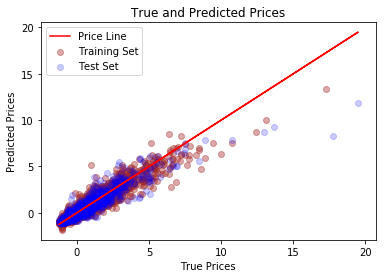

In [13]:
plt.scatter(y_train, pred_tr, color="brown", label="Training Set", alpha=0.4)
plt.scatter(y_test, pred, color="blue", label="Test Set", alpha=0.2)
plt.plot(y_test, y_test, color="red", label="Price Line")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True and Predicted Prices")
plt.legend(loc = "upper left")
plt.show()

## 2. CLASSIFICATION

In [0]:
# Data Loading
data_cls = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data_Science/odev/kidney_disease.csv")

# Data Cleaning
data_cls[['htn','dm','cad','pe','ane']] = data_cls[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})

data_cls[['rbc','pc']] = data_cls[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

data_cls[['pcc','ba']] = data_cls[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

data_cls[['appet']] = data_cls[['appet']].replace(to_replace={'good':2,'poor':1,'no':0})

data_cls['classification'] = data_cls['classification'].replace(to_replace={'ckd':1,'ckd\t':1,'notckd':0,'no':0})

data_cls.rename(columns={'classification':'class'}, inplace=True)

data_cls['pe'] = data_cls['pe'].replace(to_replace='good',value=0)

data_cls['appet'] = data_cls['appet'].replace(to_replace='no',value=0)

data_cls['cad'] = data_cls['cad'].replace(to_replace='\tno',value=0)

data_cls['dm'] = data_cls['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

data_cls[["pcv", "wc", "rc"]]=data_cls[["pcv", "wc", "rc"]].replace(to_replace={'\t?':np.nan})

data_cls[["pcv", "wc", "rc"]]=data_cls[["pcv", "wc", "rc"]].astype(float)

data_cls.drop('id',axis=1,inplace=True)

data_cls=data_cls.dropna(axis=0)

In [16]:
data_cls.shape

(158, 25)

In [17]:
data_cls.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0,0.0,1.0,1.0,1.0,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1.0,1,0.0,1.0,0.0,1.0,1
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1.0,1,0.0,1.0,1.0,0.0,1
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1.0,1,1.0,1.0,1.0,0.0,1
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1.0,1,1.0,1.0,1.0,1.0,1


In [0]:
X_cls=data_cls.iloc[:,0:24]
y_cls=data_cls.iloc[:,24:25]

X_cls_data, X_cls_test, y_cls_data, y_cls_test=train_test_split(X_cls, y_cls, test_size=0.2, random_state=285)
X_cls_train, X_cls_valid, y_cls_train, y_cls_valid=train_test_split(X_cls_data, y_cls_data, test_size=0.25, random_state=285)

In [0]:
classifier=models.Sequential()

classifier.add(layers.Dense(64, activation="relu", input_shape=(24,)))
classifier.add(layers.Dense(16, activation="relu"))
classifier.add(layers.Dense(1, activation="sigmoid"))

classifier.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_cls=classifier.fit(X_cls_train, y_cls_train, epochs=50, validation_data=(X_cls_valid, y_cls_valid), verbose=0)

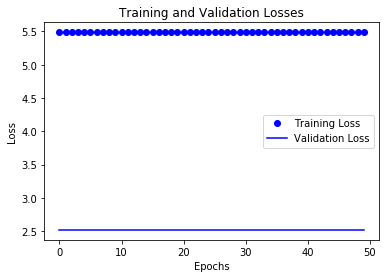

In [28]:
loss_cls=history_cls.history["loss"]
val_loss_cls=history_cls.history["val_loss"]

epochs=range(0, len(loss_cls))

plt.plot(epochs, loss_cls, "bo", label="Training Loss")
plt.plot(epochs, val_loss_cls, "b", label="Validation Loss")
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 3. İYİLEŞTİRMELER

Her iki model için de parametrelerle oynanarak ve katman sayıları değiştirilerek en uygun modeller bulunabilir.

Ancak, sınıflandırma modelinde boş veriler olan satırlar çıkarıldığında, geriye çok az veri kalmakta ve verimiz dengesiz bir veri setine dönüşmektedir. Bunun neticesinde, sinir ağı modeli kullanmak gereksiz hale gelmektedir.

Bunun önüne geçmek için boş değerler uygun verilerle doldurulabilir veya örnek çoğaltma yöntemleri kullanılarak veri setimiz zenginleştirilebilir.